In [1]:
import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
#!pip install tensorflow==2.0.0-beta0


tf.enable_eager_execution()

1.15.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, Activation, BatchNormalization, LSTM
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd /content/gdrive/My\ Drive/Digikala

/content/gdrive/My Drive/Digikala


In [0]:
df = pd.read_csv('digi_VahidEditation_balanced_4class.csv')

In [6]:
df.head(10)

,Unnamed: 0,product_id,product_title,title_en,user_id,likes,dislikes,verification_status,recommend,title,comment,advantages,disadvantages,commnet,target
0,9481,390731,کاور ارتشی مدل CAMO مناسب برای گوشی موبایل سام...,AC,7899262,4,0,verified,1,مرصاد,کل چیزه خوبیه نااااابیه,خیلی ضربه هارو میگیره نایی گوشی زیاد دستشون می...,گوشرو حجیم میکنه وهمین باعث مقاوم بودنشه,کل چیزه خوبیه نااااابیه,2
1,9484,204739,برس مو کریستین بیوتی مدل G40,PC,4297436,4,1,verified,2,بسیار خوب کیفیت,بسیار خوب کاربردی کیفیت جنس بسیار خوب علاوه قی...,سبک خوش دست ابعاد مناسب تراکم دندانه کافی,فیلد خالی,بسیار خوب کاربردی کیفیت جنس بسیار خوب علاوه قی...,2
2,9486,338005,پردازنده مرکزی ای ام دی مدل RYZEN Threadripper...,IT,2725075,4,2,verified,1,صرفه,قیمت جهانی پردازنده دوبرابر ۸۷۰۰ می باشد ولی د...,فیلد خالی,فیلد خالی,قیمت جهانی پردازنده دوبرابر ۸۷۰۰ می باشد ولی د...,2
3,9491,422210,ساعت هوشمند ای تاپ مدل ET-SW9,PA,7772361,5,0,verified,2,نسبت پولی پرداخت میشه کیفیت عالی داره,ساعت رو چند روزه دارم خیلی زیباتر اینه تو عکس ...,فیلد خالی,فقط دوربین ضغیفه جاشم بده کسی دوربین اینو نمیخره,ساعت رو چند روزه دارم خیلی زیباتر اینه تو عکس ...,2
4,9492,507243,چسب نانودوغاب ترمیم نانوپوش مدل nps109,TC,5423718,5,2,verified,0,اصلا خوب نیست,اصلا بدرد نمیخوره بعد سه روز کنده میشه زود کثی...,فیلد خالی,فیلد خالی,اصلا بدرد نمیخوره بعد سه روز کنده میشه زود کثی...,2
5,9493,690194,هسته گیر آلبالو بهتاش کد 002,HW,3578560,40,3,verified,0,مفت گرونه,یه تیکه پلاستیک ناکارآمد,فیلد خالی,فیلد خالی,یه تیکه پلاستیک ناکارآمد,2
6,9495,491160,هندزفری بلوتوث هوکو مدل E10,AC,7706124,5,1,verified,2,خوبه نسبت قیمت عالی,امروز دستم رسید برد بالا زیبا برد قابل قبول,فیلد خالی,فیلد خالی,امروز دستم رسید برد بالا زیبا برد قابل قبول,2
7,9505,450277,ماشین اصلاح صورت جیمی مدل GM-737,PA,3578560,4,0,verified,0,مزخرف آشغال,حتی اگه موی سرتو بکنی زور بکنی لای تیغه هاش نص...,فیلد خالی,فیلد خالی,حتی اگه موی سرتو بکنی زور بکنی لای تیغه هاش نص...,2
8,9514,194731,کفپوش سه بعدی چرمی خودرو بابل مناسب برای پژو 206,TC,3210417,5,1,verified,1,خیلی خوب,خیلی عالیه فیت فقط دوتا مشکل داره اینکه کفی عق...,فیلد خالی,فیلد خالی,خیلی عالیه فیت فقط دوتا مشکل داره اینکه کفی عق...,2
9,9524,3306,وب کم HD مایکروسافت مدل لایف کم HD-3000,IT,626519,7,0,verified,2,خوبه جمع جوره,وب کم خوبیه ریزه میزه کیفیتش بدک نیست برنامه ت...,فیلد خالی,فیلد خالی,وب کم خوبیه ریزه میزه است کیفیتش بدک نیست برنا...,2


In [0]:
for i, v in df.iterrows():
    if v[14] == 0 :
        df = df.drop(axis=0, index=i)

In [0]:
df.to_csv("digi_VahidEditation_balanced_4class.csv", index=False, encoding="utf-8")

In [0]:
X = df['comment']
y = df['target']

In [0]:
from keras.utils import to_categorical
y_binary = to_categorical(y)

In [0]:
# Split train data into train and validation
train_x, valid_x, train_y, valid_y = train_test_split(X, y_binary, test_size=0.3)

In [0]:
train_labels = train_y
valid_labels = valid_y

## NN Models

In [0]:
vocab_size = 10000
embedding_dim = 160
max_length = 120
trunc_type='post'

In [0]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(train_x)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_x)
valid_sequences = tokenizer.texts_to_sequences(valid_x)

In [0]:
# get only the top frequent words on train
train_data = pad_sequences(train_sequences, padding = "post", maxlen = max_length)
# get only the top frequent words on test
valid_data = pad_sequences(valid_sequences, padding = "post", maxlen = max_length)

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_data[1]))
print(train_x[1])

خدمت دوستانی قصد خرید مدل رو دارند عرض کنم تصویر فیلمهای ۴ پشتیبانی نمیکند اسمبل ایران کیفیت شبکه های داخلی خیلی بد هست فقط شبکه های رو خوب نشون میده طراحی ریموت کنترل میتونست بهتر باشه فقط فیلمهای رو زیبا نشون میده رنگها طبیعی هست تنظیمات صدا خیلی خوب هست تلویزیون سایزش بزرگ هست حتما دور نگاه جلو رزولوشن تصویر پایین هستش تقریبا کامل هست بعد کانال یابی قابلیت مرتب کردن کانالها نیست حالت هیچ وجه بازی اپلیکیشن قابل نصب نیست یعنی اصلا فکر کنم ایران وصل نشه شبکه فیلیپس بازی نرم افزار نصب کنیم نرم افزار تلویزیون آندروید نیست موفق پیروز باشید ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
بسیار خوب کاربردی کیفیت جنس بسیار خوب علاوه قیمت متناسب


In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 160)          1600000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 19200)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 115206    
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 35        
Total params: 1,715,241
Trainable params: 1,715,241
Non-trainable params: 0
_________________________________________________________________


In [39]:
history = model.fit(train_data, train_labels, epochs = 20, validation_data = (valid_data, valid_labels), verbose = 1)

Train on 72800 samples, validate on 31200 samples
Epoch 1/20
72800/72800 [==============================] - 58s 803us/sample - loss: 1.1744 - acc: 0.4376 - val_loss: 0.8547 - val_acc: 0.6146
Epoch 2/20
72800/72800 [==============================] - 57s 784us/sample - loss: 0.6061 - acc: 0.7433 - val_loss: 0.6740 - val_acc: 0.7131
Epoch 3/20
72800/72800 [==============================] - 55s 756us/sample - loss: 0.3369 - acc: 0.8668 - val_loss: 0.7326 - val_acc: 0.7297
Epoch 4/20
72800/72800 [==============================] - 56s 766us/sample - loss: 0.2364 - acc: 0.9078 - val_loss: 0.9170 - val_acc: 0.7372
Epoch 5/20
72800/72800 [==============================] - 56s 765us/sample - loss: 0.1905 - acc: 0.9257 - val_loss: 0.9704 - val_acc: 0.7314
Epoch 6/20
72800/72800 [==============================] - 57s 778us/sample - loss: 0.1686 - acc: 0.9331 - val_loss: 1.1506 - val_acc: 0.7430
Epoch 7/20
72800/72800 [==============================] - 54s 743us/sample - loss: 0.1502 - acc: 0.9393 

In [0]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string ])
    plt.show

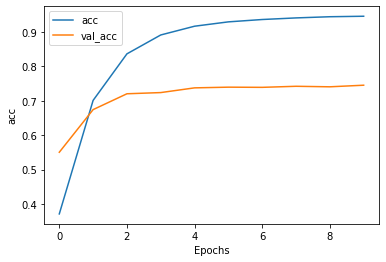

In [33]:
plot_graphs(history, "acc")

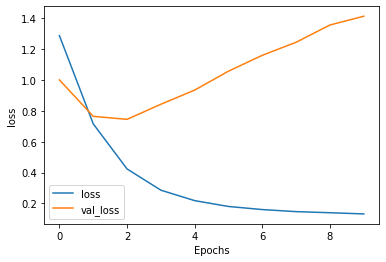

In [34]:
plot_graphs(history, "loss")

In [40]:
results = model.evaluate(valid_data, valid_labels)

31200/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [41]:
print('Test accuracy: ', results[1])

Test accuracy:  0.74935895


In [42]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

(10000, 160)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')